# Comunicados de Política Monetaria
## Parte 1.

En este notebook crearemos un pandas DataFrame con las decisiones de política monetaria de Banxico y haremos un análisis de la información recabada.

In [158]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 4)

La información de decisción de política monetaria se encuentra en la siguiente url.

In [3]:
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")


* Entra a `url` y analiza la página.

In [4]:
print(url)

https://www.banxico.org.mx/publicaciones-y-prensa/anuncios-de-las-decisiones-de-politica-monetaria/anuncios-politica-monetaria-t.html


* Como podemos observar, la url objetivo contiene
    * las fechas de decisiones de política monetaria,
    * el resumen de las decisiones de política monetaria y
    * una url que nos dirige a un pdf con el texto completo del Anuncio de Política Monetaria.
    
<h3 style="color:crimson">Ejercicio</h3>

1. Por medio de `requests_html`, extrae los tres puntos antes mencionados y guárdalos dentro de un DataFrame con columnas `"date"`, `"text"` y `"url"`;
2. Con el dataframe seleccionado, filtra todos comunicados anteriores al 15 de febrero de 2008, i.e., queremos todos los comunicados a partir del 15 de Febrero de 2008;
3. Guarda tu DataFrame dentro de un archivo `.pkl` con nombre `comunicados-banxico.pkl`: **hint:** Revisa el uso del método `to_pickle`.

In [6]:
#Creamos la sesión HTML
with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [7]:
#Descargamos todos los comunicados
len(r.html.find("tr"))

184

In [8]:
#Analizamos el primer comunicado para poder extraer la información de los demás 
all_statements = r.html.find("tr")
statement = all_statements[0]

In [9]:
class_date = "td[class='bmdateview']"
class_text = "td[class='bmtextview']"

In [10]:
date_str = statement.find(class_date, first = True).text
text_str= statement.find(class_text,first = True).text
url,*_ = statement.find(class_text,first=True).absolute_links

In [11]:
texto = text_str[:-15]
print(texto)

El objetivo para la Tasa de Inter�s Interbancaria a 1 d�a (tasa objetivo) disminuye en 25 puntos base


In [12]:
date = datetime.strptime(date_str, "%d/%m/%y")

In [13]:
from datetime import datetime
datetime.today().strftime("%B %d, %Y")

'March 16, 2020'

In [14]:
def extract_info(statement):
    class_date = "td[class='bmdateview']"
    class_text = "td[class='bmtextview']"
    class_url = "a[class='href']"
    
    
    date_str = statement.find(class_date, first = True).text
    text_str = statement.find(class_text,first = True).text
    texto = text_str[:-15]
    url,*_ = statement.find(class_text,first=True).absolute_links
    date = datetime.strptime(date_str, "%d/%m/%y")
    
    return {
        "date": date,
        "text": texto,
        "url": url
    }

In [15]:
extract_info(statement)

{'date': datetime.datetime(2020, 2, 13, 0, 0),
 'text': 'El objetivo para la Tasa de Inter�s Interbancaria a 1 d�a (tasa objetivo) disminuye en 25 puntos base',
 'url': 'https://www.banxico.org.mx/publicaciones-y-prensa/anuncios-de-las-decisiones-de-politica-monetaria/{F2570B49-2124-CAD3-09A5-380DC3E4CD0C}.pdf'}

In [16]:
#Extraemos la información de cada comunicado y creamos un DataFrame con  la información
content = [extract_info(statement) for statement in all_statements]
content = pd.DataFrame(content)
content = content.set_index("date")
content.head()

,text,url
date,,
2020-02-13,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-12-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-11-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-09-26,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


In [17]:
#Filtramos el DataFrame obtenido para obtener los comunicados anteriores al 15 de febrero de 2008

content_filtered = content[content.index >= '2008-02-15' ]
content_filtered.tail()

,text,url
date,,
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


In [175]:
#Guardamos el DataFrame en un archivo pkl
content.to_pickle("C:/Users/Christopher/Documents/Diplomado/comunicados-banxico.pkl")

<h3 style="color:crimson">Ejercicio</h3>

Por medio del método `str.extract` para un pandas Series, crea una nueva columna `"category"` que extraiga del texto si la tasa se 
1. `"mantiene"`
2. `"incrementa"`
3. `"disminuye"`

,text,url,category
date,,,
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,incrementa


In [18]:
content_filtered.head()

,text,url
date,,
2020-02-13,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-12-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-11-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-09-26,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


In [19]:
#Consideramos solo la columna 'text'
t = content_filtered['text']

In [20]:
#Se buscan las expresiones regulares dentro del texto 
result_disminuye = t.str.extract('\W*(disminuye)\W*')
result_mantiene = t.str.extract('\W*(mantiene)\W*')
result_aumenta= t.str.extract('\W*(incrementa)\W*')

In [21]:
r= result_disminuye.combine_first(result_mantiene.combine_first(result_aumenta))

In [22]:
#Agregamos la columna con la clasificacion obtenida 
content_final = pd.merge(content_filtered, r, on='date')
content_final.columns = ['text','url','category']
content_final.head()

,text,url,category
date,,,
2020-02-13,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-12-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-11-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-09-26,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye


<h3 style="color:crimson">Ejercicio</h3>

Cuenta las veces en las que la tasa se mantuvo, se incrementó o se disminuyó.

mantiene      72
incrementa    18
disminuye     14
Name: category, dtype: int64

In [23]:
#Hacemos el conteo  sobre la columna 'category'
content_final['category'].value_counts()

mantiene      72
incrementa    18
disminuye     16
Name: category, dtype: int64

<h3 style="color:crimson">Ejercicio</h3>

Reproduce la siguiente figura sobre los comunicados de prensa de Banxico:
1. La gráfica de la izquierda representa una serie de tiempo sobre los comunicados de banxico. Si `y=1`, la tasa de referencia se incrementó; si `y=0`, la tasa se mantuvo; finalmente, si `y=-1`, la tasa disminuyó.
2. La gráfica de la derecha es una gráfica de barras del ejercicio anterior

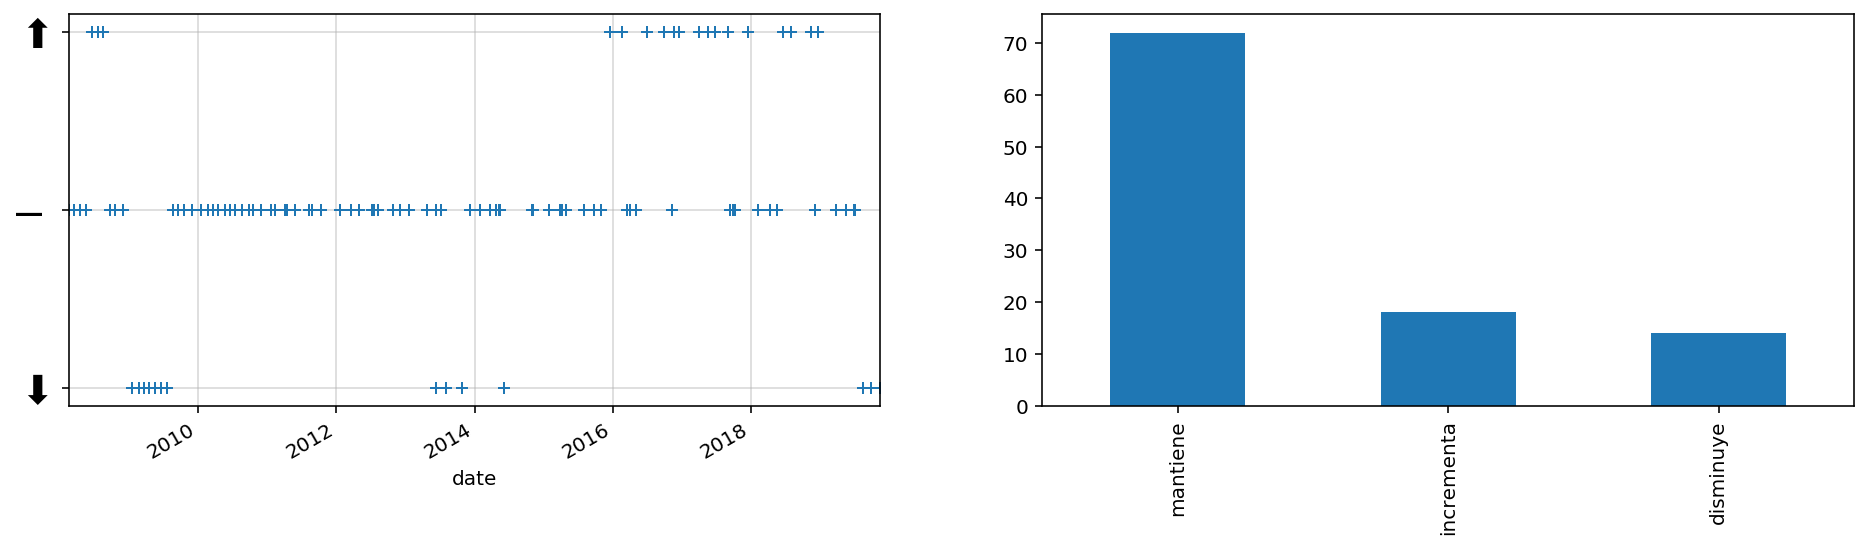

In [65]:
#Definimos una función para asignar el valor
def valor(x):
    if x == "incrementa":
        y = 1
    elif x == "mantiene":
        y = 0
    else:
        y = -1
    return y 

In [66]:
vals = content_final['category'].apply(lambda x:valor(x))

[]

C:\Users\Christopher\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


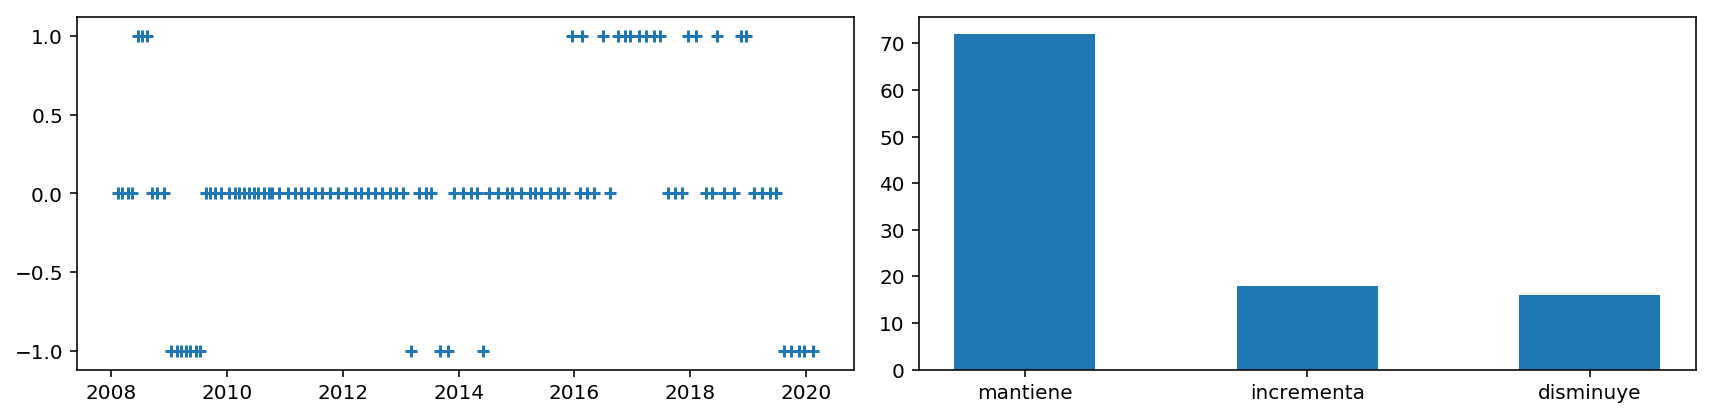

In [153]:
#Creamos el grid con ambas figuras
fig, axs = plt.subplots(1, 2,figsize=(12,3), tight_layout= True)

axs[0].scatter(vals.index, vals, marker = "+")
axs[1].bar(['mantiene', 'incrementa', 'disminuye'],content_final['category'].value_counts(), width = 0.5)
plt.plot()

<h3 style="color:crimson">Ejercicio</h3>

Agrupa por año y cuenta el número de comunicados en un año para cada categoría.

In [80]:
years = content_final.index.strftime("%Y")

In [128]:
#Agrupamos por año y contamos el número de comunicados para cada categoría 
d = content_final.groupby([years,content_final['category']])['category'].agg(['count'])
d.head()

count
     category         
2008 incrementa      3
     mantiene        7
2009 disminuye       7
     mantiene        4
2010 mantiene       11

In [148]:
d.unstack(level=0).T.index

MultiIndex(levels=[['count'], ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]])

<h3 style="color:crimson">Ejercicio</h3>

Con el resultado anterior, replica la siguiente gráfica

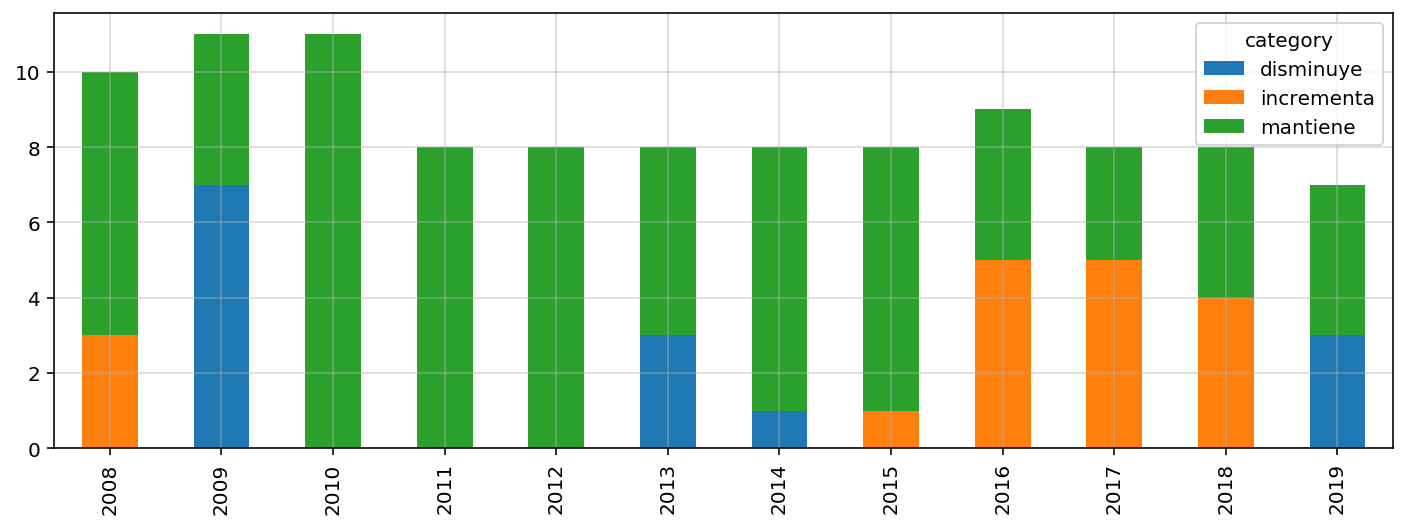

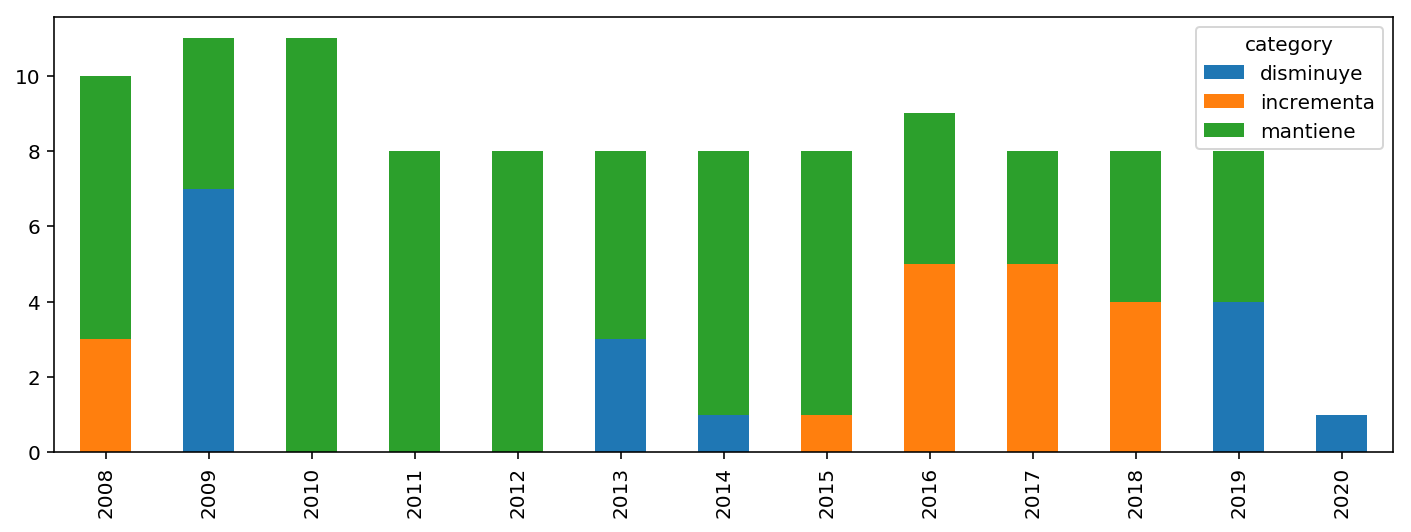

In [152]:
#Graficamos el resultado anterior
d.unstack(level=0).T.plot( kind = "bar", stacked = True).set_xticklabels(labels)
labels = ['2008', '2009', '2010', '2011', '2012','2013','2014','2015','2016','2017','2018','2019','2020']
plt.show()

# Banxico Parte 2:

* Ocupando **únicamente** pandas, numpy; matplotlib; seaborn, con la información obtenida en la parte 1 (pandas DataFrame) modelar con Naïve Bayes si un documento dado pertence a la clase `mantiene`, `sube`, `baja`

## Pasos
1. Descargar PDFs
2. Limpiar los datos
3. Eliminar de todos los archivo las palabras que contengan `mantiene`, `sube`, `baja`.
4. Parte los documentos entre un set de entrenamiento (0.8) y uno de prueba (0.2)
5. Entrena el modelo con los documentos de entrenamiento y valida el resultado con una matriz de confusión usado la base de prueba

In [39]:
import pandas as pd 
import numpy as np 
import seaborn 
import requests
from io import BytesIO
import os
import PyPDF2 
import nltk


In [229]:
#Obtenemos las URLs para descargar los archivos PDF
urls = content_final['url']

In [230]:
#Entramos a cada URL para descargar cada archivo y lo guardamos en la carpeta "comunicados_banxico_pdf"
for i in range(len(urls)):
    paper_url = urls[i]
    r = requests.get(paper_url)
    paper = r.content
    if not os.path.exists("comunicados_banxico_pdf"):
        os.mkdir("comunicados_banxico_pdf")
    full_path = os.path.join("comunicados_banxico_pdf", f'paper {i}.pdf')
    with open(full_path, "wb") as f:
        f.write(paper)

In [231]:
#Verificamos que  la carpeta se creó con los archivos que descargamos
ls

 Volume in drive C is Windows
 Volume Serial Number is B20F-39D5

 Directory of C:\Users\Christopher\Documents\Diplomado\data-science\ejercicios

03/17/2020  01:37 AM    <DIR>          .
03/17/2020  01:37 AM    <DIR>          ..
03/16/2020  10:06 PM    <DIR>          .ipynb_checkpoints
03/17/2020  01:37 AM           152,226 banxico-politica-monetaria-pt1.ipynb
03/16/2020  10:06 PM             1,370 banxico-politica-monetaria-pt2.ipynb
03/17/2020  01:38 AM    <DIR>          comunicados_banxico_pdf
               2 File(s)        153,596 bytes
               4 Dir(s)  21,966,770,176 bytes free


In [17]:
os.chdir('C:/Users/Christopher/Documents/Diplomado/data-science/ejercicios/comunicados_banxico_pdf')

In [7]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B20F-39D5

 Directory of C:\Users\Christopher\Documents\Diplomado\data-science\ejercicios\comunicados_banxico_pdf

03/17/2020  01:38 AM    <DIR>          .
03/17/2020  01:38 AM    <DIR>          ..
03/17/2020  01:37 AM            72,482 paper 0.pdf
03/17/2020  01:37 AM            78,691 paper 1.pdf
03/17/2020  01:37 AM            81,465 paper 10.pdf
03/17/2020  01:38 AM            42,368 paper 100.pdf
03/17/2020  01:38 AM            42,290 paper 101.pdf
03/17/2020  01:38 AM            42,197 paper 102.pdf
03/17/2020  01:38 AM            44,582 paper 103.pdf
03/17/2020  01:38 AM            43,074 paper 104.pdf
03/17/2020  01:38 AM            42,406 paper 105.pdf
03/17/2020  01:37 AM            79,556 paper 11.pdf
03/17/2020  01:37 AM            78,320 paper 12.pdf
03/17/2020  01:37 AM            80,266 paper 13.pdf
03/17/2020  01:37 AM            77,972 paper 14.pdf
03/17/2020  01:37 AM            78,261 paper 15.pdf
03/17/2020  01:

In [76]:
# creating a pdf file object 
pdfFileObj = open('paper 1.pdf', 'rb') 
  
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
  
# printing number of pages in pdf file 
print(pdfReader.numPages) 
 

# creating a page object 
pageObj = pdfReader.getPage(0) 
t = pageObj.extractText()
# extracting text from page 
print(pageObj.extractText()) 
print(type(pageObj.extractText()))
  
# closing the pdf file object 
pdfFileObj.close() 

2
  1  19 de 
dic
iembre de 2019
 Comunicado de Prensa 
 Anuncio de Política Monetaria 
 La Junta de Gobierno del Banco de México ha decidido
 disminuir en 25 puntos base el objetivo
 para la Tasa de Interés 
Interban
caria a un día a un nivel de 7.25
%.  Durante el 
cuarto
 trimestre del año 
la economía
 mundial 
contin
úa desacelerándose 
y sus perspectivas 
de crecimiento 
se 
han revisado
 a la baja. Ello, en un entorno en el que las inflaciones general y 
subyacente en las principales economías avanzadas 
se mantienen en niveles reducidos y por debajo 
de las metas de sus respectivos bancos centrales. En este contexto,
 estas instituciones han
 mantenido 
posturas monetarias acomodaticias
. En su reunión de 
diciembre
, la Reserva Federal 
mantuvo sin cambio
 el rango objetivo para la tasa de fondo
s federales
 y destacó
 que dicho
 rang
o es apropiado para alcanzar 
sus objetivos
. Los mercados 
financieros 
de economías avanzadas mostraron cambios moderados, 
mientras que los a

In [64]:
paper= []
texts = []

#Guardamos en una lista cada transcript  con el texto 
for p in range(106):
    # Creamos un  pdf file object 
    pdfFileObj = open(f'paper {p}.pdf', 'rb') 
      # Creamos pdf reader object 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    pags = pdfReader.numPages

    for i in range(pags):
        pageObj = pdfReader.getPage(i)
        texts.append(pageObj.extractText())
    
    paper.append(texts)
    texts = []
    pdfFileObj.close()


In [65]:
len(paper)

106

In [80]:
paper[0]

['   Comunicado de Prensa \n              \n13 de \nfebrero\n de \n2020\n Anuncio de Política Monetaria\n La Junta de Gobierno del Banco de México ha decidido\n disminuir\n en 25 puntos base \nel objetivo\n para la Tasa de Interés Interbancaria a un día \na un nivel de \n7%.  En la economía mundial \nse mantienen \ncaracterísticas\n de desaceleración\n, baja inflación\n, posturas monetarias \nacomodaticias\n y menores tasas de interés\n. Si bien en este entorno las condiciones financieras globales han \nseguido relajándose, e\nl balance de riesgos para la actividad económica mundial continúa sesgado a la baja\n ante la presencia de diversos \nfactores de incertidumbre\n, incluyendo los efectos del \nreciente \nbrote de \ncoronavirus\n. En este contexto, \nen las últimas semanas\n el tipo de cambio se apreció y\n las tasas de interés de \nvalores gubernamentales \nen todos sus\n plazos \nse redujeron\n. No obstante\n, persisten riesgos externos \ne internos que pudieran afectar \nel \nd

In [78]:
from unidecode import unidecode
import re 

def clean_text(texto):
    text = unidecode(texto)
    text = text.lower()
    text = re.sub("[^\w ]","",texto)
    text = re.sub("[\d]","",texto)
    text = re.sub("dismin\w+|manten\w+|incremen\w+|aument\w+","",texto)
    text_a = text.lstrip().rstrip()
    return text_a